# Predecir la diabetes

Este proyecto fue creado en grupo en un Bootcamp de Data Scientist. Mis compañeros fueron: Javier Serna Gálvez, Miriam Lamas y Manuel Ruiz.

<a name="code_repository4"></a>
## Índice 
* [1. Introducción](#item1_r4)
* [2. EDA y Procesamiento de Datos](#item2_r4)
* [3. SMOTE](#item3_r4)
* [4. Determinar el modelo](#item4_r4)
* [5. Disminuir dimensionalidad del data set](#item5_r2)
    * [5.1. Alternativa 1: sklearn.feature_selection](#item5.1_r2)
    * [5.2. Opción 2: permutation_importance ](#item5.2_r2)
* [6. Tuning](#item6_r4)
* [7. Conclusión](#item7_r4)

<a name="item1_r4"></a>
## Introducción


El propósito de este proyecto es determinar si una persona tiene diabetes o no, utilizando un modelo predictivo entrenado con datos de Estados Unidos. Los datos presentaban un desbalance, ya que había una mayor cantidad de casos negativos (sin diabetes). Para abordar este desbalance, se exploraron dos métodos, SMOTE (oversampling y undersampling), con el objetivo de lograr un equilibrio en los datos.

Posteriormente, se evaluaron varios modelos predictivos mediante métricas específicas, y se seleccionó el modelo que mejor se ajustaba a los datos. Los modelos analizados incluyeron:

- 'Logistic Regression'
- 'Decision Tree'
- 'Random Forest'
- 'SVM'
- 'KNN'
- 'Nearest Centroid Classifier'
- 'Gaussian Naive Bayes Classifier'

El modelo seleccionado fue Random Forest. Luego, se redujo la dimensionalidad del conjunto de datos, identificando y eliminando parámetros con poca variabilidad que no influyeron significativamente en la predicción.

Finalmente, se volvió a entrenar el modelo con Random Forest y se realizó un ajuste fino (tuning) para validar y mejorar la efectividad del modelo.

<a name="item2_r4"></a>
## 2. EDA y Procesamiento de Datos

In [1]:
# Importamos librerías
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
# Importamos los datos
# Importante cambiar ruta del dataset si es necesario

df = pd.read_csv("Dataset Diabetes.csv")

In [3]:
# Número de filas y columnas
df.shape

(253680, 22)

In [4]:
# Previsualización del dataframe
df.head()

,Diabetes_012,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
0,0.0,1.0,1.0,1.0,40.0,1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,5.0,18.0,15.0,1.0,0.0,9.0,4.0,3.0
1,0.0,0.0,0.0,0.0,25.0,1.0,0.0,0.0,1.0,0.0,...,0.0,1.0,3.0,0.0,0.0,0.0,0.0,7.0,6.0,1.0
2,0.0,1.0,1.0,1.0,28.0,0.0,0.0,0.0,0.0,1.0,...,1.0,1.0,5.0,30.0,30.0,1.0,0.0,9.0,4.0,8.0
3,0.0,1.0,0.0,1.0,27.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,0.0,0.0,0.0,0.0,11.0,3.0,6.0
4,0.0,1.0,1.0,1.0,24.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,3.0,0.0,0.0,0.0,11.0,5.0,4.0


**Explicación de las variables**

**Diabetes_012**: variable objetivo a predecir. 

Tiene 3 clases:

0 es para no diabetes o sólo diabetes que se produce durante el embarazo.
1 es para prediabetes.
2 para diabetes.

**HighBP**: high blood presure (presión arterial alta) 

Variable binaria:{0:no, 1:sí}

**HighChol**: high cholesterol (colesterol alto) 

 Variable binaria:{0:no, 1:sí}

**CholCheck**: chequeo de colesterol en los últimos 5 años 

Variable binaria:{0:no, 1:sí}

**BMI**: Body Mass Index (Índie de Masa Corporal). 

Se considera un peso normal en el rango entre (18,5 - 24,99).

**Smoker**: Fumador 

Se considera persona fumadora si ha fumado 100 o más cigarros a lo largo de su vida 

Variable binaria:{0:no, 1:sí}

**Stroke**: Si ha tenido alguna vez un derrame cerebral 

Variable binaria:{0:no, 1:sí}

**HeartDiseaseorAttack**: Si ha padecido alguna vez enfermedad coronaria o infarto de miocardio  

Variable binaria:{0:no, 1:sí}

**PhysActivity**: Actividad física en los últimos 30, sin incluir trabajo

Variable binaria:{0:no, 1:sí}

**Fruits**: Consume frutas una o más veces por día 

Variable binaria:{0:no, 1:sí}

**Veggies**: Consume vegetales una o más veces por día 

Variable binaria:{0:no, 1:sí}

**HvyAlcoholConsump**: Bebedores (hombres adultos que consumen más de 14 bebidas a la semana y mujeres adultas que consumen más de 7 bebidas a la semana) 

Variable binaria:{0:no, 1:sí}

**AnyHealthcare**: Disponer de cualquier tipo de cobertura sanitaria, incluidos seguros de enfermedad 

Variable binaria:{0:no, 1:sí}

**NoDocbcCost**: En los últimos 12 meses, ¿ha necesitado ir al médico pero no ha podido por motivos económicos? 

Variable binaria:{0:no, 1:sí}

**GenHlth**. Diría que, en general, su salud es (escala 1-5): 

1 = excelente 2 = muy buena 3 = buena 4 = regular 5 = mala

**MentHlth**: Cómo valora su salud mental,que incluye el estrés, la depresión y los problemas con las emociones. Cuantos días de los últimos 30 días su salud mental no fue buena.

**PhysHlth**: Cómo valora salud física, que incluye enfermedades y lesiones físicas. Durante cuántos días de los últimos 30 días su salud física no fue buena

**DiffWalk**: Si tiene serias dificultades para caminar o subir escaleras = 

Variable binaria:{0:no, 1:sí}

**Sex**: sexo 

Variable binaria:{0:femenino, 1:masculino}

**Age**: edad (escala 1-13). 

1:[18-24], 2:[25-29], 3[30-34], 4[35-39], 5[40-44], 6:[45-49], 7:[50-54], 8:[59-59], 9:[60-64], 10:[65-69], 11:[70-74], 12:[75:79], 13:[80 en adelante]

**Education**: Nivel educativo (escala 1-6). 

1:Nunca asistieron a la escuela o sólo al jardín de infancia 2:primaria 2:secundaria 3:bachillerato 4:ciclo superior 5:colegio técnico o universidad (1 a 3 años) 6:grado universitario (4 años o más)

**Income**: Ingresos (escala 1-8) (valores en dólares):

    1:menos de 10000
    2:de 10000 a menos de 15000
    3:de 15000 a menos de 20000
    4:de 20000 a menos de 25000
    5:de 25000 a menos de 35000
    6:de 35000 a menos de 50000
    7:de 50000 a menos de 75000
    8:75000 o más
    

In [52]:
# Información relativa a cada variable (columna): cantidad de valores no nulos (0) y tipo de dato de cada variable (float)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 253680 entries, 0 to 253679
Data columns (total 22 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   Diabetes_012          253680 non-null  float64
 1   HighBP                253680 non-null  float64
 2   HighChol              253680 non-null  float64
 3   CholCheck             253680 non-null  float64
 4   BMI                   253680 non-null  float64
 5   Smoker                253680 non-null  float64
 6   Stroke                253680 non-null  float64
 7   HeartDiseaseorAttack  253680 non-null  float64
 8   PhysActivity          253680 non-null  float64
 9   Fruits                253680 non-null  float64
 10  Veggies               253680 non-null  float64
 11  HvyAlcoholConsump     253680 non-null  float64
 12  AnyHealthcare         253680 non-null  float64
 13  NoDocbcCost           253680 non-null  float64
 14  GenHlth               253680 non-null  float64
 15  

In [55]:
df.columns

Index(['Diabetes_012', 'HighBP', 'HighChol', 'CholCheck', 'BMI', 'Smoker',
       'Stroke', 'HeartDiseaseorAttack', 'PhysActivity', 'Fruits', 'Veggies',
       'HvyAlcoholConsump', 'AnyHealthcare', 'NoDocbcCost', 'GenHlth',
       'MentHlth', 'PhysHlth', 'DiffWalk', 'Sex', 'Age', 'Education',
       'Income'],
      dtype='object')

In [7]:
# Transformamos las variables a enteros para mejorar la representación gráfica y el uso de los datos

df['Diabetes_012'] = df['Diabetes_012'].astype('int')
df['HighBP'] = df['HighBP'].astype('int')
df['HighChol'] = df['HighChol'].astype('int')
df['CholCheck'] = df['CholCheck'].astype('int')
df['BMI'] = df['BMI'].astype('int')
df['Smoker'] = df['Smoker'].astype('int')
df['Stroke'] = df['Stroke'].astype('int')
df['HeartDiseaseorAttack'] = df['HeartDiseaseorAttack'].astype('int')
df['PhysActivity'] = df['PhysActivity'].astype('int')
df['Fruits'] = df['Fruits'].astype('int')
df['Veggies'] = df['Veggies'].astype('int')
df['HvyAlcoholConsump'] = df['HvyAlcoholConsump'].astype('int')
df['AnyHealthcare'] = df['AnyHealthcare'].astype('int')
df['NoDocbcCost'] = df['NoDocbcCost'].astype('int')
df['GenHlth'] = df['GenHlth'].astype('int')
df['MentHlth'] = df['MentHlth'].astype('int')
df['PhysHlth'] = df['PhysHlth'].astype('int')
df['DiffWalk'] = df['DiffWalk'].astype('int')
df['Sex'] = df['Sex'].astype('int')
df['Age'] = df['Age'].astype('int')
df['Education'] = df['Education'].astype('int')
df['Income'] = df['Income'].astype('int')

In [8]:
# Revision:
# for col in df.columns:
    
#     df[col] = df[col].astype("int")

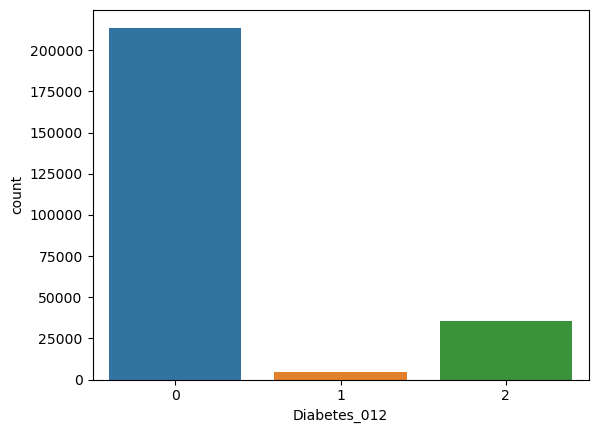

In [9]:
sns.countplot(x = df["Diabetes_012"])

plt.show()

In [10]:
# Convertimos los datos de diabetes a variable binaria sumando los prediabetes (1) a los de diabetes (2)
df["Diabetes_012"].replace({2:1},inplace=True)

In [11]:
df = df.rename(columns = {"Diabetes_012" : "Diabetes"})

In [12]:
df

,Diabetes,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
0,0,1,1,1,40,1,0,0,0,0,...,1,0,5,18,15,1,0,9,4,3
1,0,0,0,0,25,1,0,0,1,0,...,0,1,3,0,0,0,0,7,6,1
2,0,1,1,1,28,0,0,0,0,1,...,1,1,5,30,30,1,0,9,4,8
3,0,1,0,1,27,0,0,0,1,1,...,1,0,2,0,0,0,0,11,3,6
4,0,1,1,1,24,0,0,0,1,1,...,1,0,2,3,0,0,0,11,5,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
253675,0,1,1,1,45,0,0,0,0,1,...,1,0,3,0,5,0,1,5,6,7
253676,1,1,1,1,18,0,0,0,0,0,...,1,0,4,0,0,1,0,11,2,4
253677,0,0,0,1,28,0,0,0,1,1,...,1,0,1,0,0,0,0,2,5,2
253678,0,1,0,1,23,0,0,0,0,1,...,1,0,3,0,0,0,1,7,5,1


In [13]:
# REVISION: Eliminamos repetidos

print(f"Antes de eliminar duplicados: {df.shape[0]}")

df = df.drop_duplicates()

print(f"Después de eliminar duplicados: {df.shape[0]}")

Antes de eliminar duplicados: 253680
Después de eliminar duplicados: 229712


<a name="item3_r4"></a>
## 3. SMOTE

Hay un desequilibrio de la variable objetivo (Diabetes). Por tal motivo, se decide aplicar dos métodos SMOTE (oversampling y undersampling) a fin de lograr el equilibrio. 

A partir de oversampling se aumenta aleatoriamente los registros de la clase minoritaria al replicarlos. Mientras que undersampling se eliminan algunos registros de la clase mayoritaria. 


In [14]:
from imblearn.over_sampling import SMOTE 
from imblearn.under_sampling import RandomUnderSampler
from collections import Counter

In [15]:
# Function that applies oversampling to a dataset

# Input: X matrix of data, y array of labels, 
#        strategy float to set the sampling straegy

# Output: X_balanced matrix of data after oversampling, 
#         y_balanced array of labels after overrsampling

def oversampling(X, y, strategy):

    oversampler = SMOTE(sampling_strategy = strategy)
    X_balanced, y_balanced = oversampler.fit_resample(X, y)
    
    return X_balanced, y_balanced

In [16]:
# Function that applies undersampling to a dataset

# Input: X matrix of data, y array of labels, 
#        strategy float to set the sampling strategy

# Output: X_balanced matrix of data after undersampling, 
#         y_balanced array of labels after undersampling

def undersampling(X, y, strategy):

    undersampler = RandomUnderSampler(sampling_strategy = strategy) 
    X_balanced, y_balanced = undersampler.fit_resample(X, y)
    
    return X_balanced, y_balanced

In [17]:
# Function that applies first undersampling and then applies
# oversampling to a dataset

# Input: X matrix of data, y array of labels,
#        strategy_over float to set the sampling strategy to oversampling
#        strategy_under float to set the sampling strategy to undersampling

# Output: X matrix of data after sampling,
#         y array of labels after sampling

def hibridsampling(X, y, strategy_over, strategy_under):#Determinar conjuto Train y Test

    print("Before SMOTE")
    print(Counter(y))
    sns.countplot(x = y)
    plt.show()
    print()
    
    X, y = undersampling(X,y,strategy_under)
    
    print("Afert undersampling")
    print(Counter(y))
    
    X, y = oversampling(X,y,strategy_over)
    
    print("After oversampling")
    print(Counter(y))
    print()
    
    print("Afert SMOTE")
    print(Counter(y))
    sns.countplot(x = y)
    plt.show()
    
    return X,y

<a name="item4_r4"></a>
## 4. Determinar el modelo

Se analizan diferentes modelos de machine learning. Se eligen el modelo apropiado para el dataset de Diabetes. 

In [18]:
def Determinar_Xy (df, objetivo):
    
    X = df.drop(objetivo, axis = 1) 
    y = df[objetivo]
    
    #Sampling
   
    X,y = hibridsampling(X, y, 0.6, 0.3)
    
    return X, y

In [19]:
# REVISION: Modifiqué el total de elementos de oversampling y undersampling

Before SMOTE
Counter({0: 190055, 1: 39657})


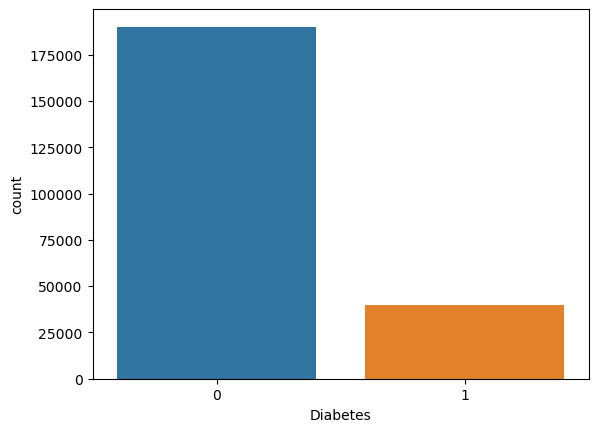


Afert undersampling
Counter({0: 132190, 1: 39657})


In [ ]:
X,y = Determinar_Xy (df,"Diabetes")

print(f"X.shape = {X.shape}")
print(f"y.shape = {y.shape}")

In [ ]:
#X.to_csv('x.csv') 
#y.to_csv('y.csv') 

In [ ]:
#Funcion para normalizar y determinar datos de entrenamiento y ensayo.

def etapa_inicial_ML (X,y):
    
    #Normalizar
    
    from sklearn.preprocessing import MinMaxScaler

    x_scaler = MinMaxScaler()
    X = x_scaler.fit_transform(X)
    
    #print(f" X normalizado {X}")
    
    from sklearn.model_selection import train_test_split
    
    #Determinar conjuto Train y Test

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42) #stratify =y, div equitalita de datos en train y test
    
    print(f"X_train: {X_train.shape}, y_train: {y_train.shape}")
    print(f"X_test: {X_test.shape},  y_test: {y_test.shape}")

    return X_train, X_test, y_train, y_test

In [ ]:
X_train, X_test, y_train, y_test = etapa_inicial_ML (X,y)

In [ ]:
#Funcion para encontrar la cantidad de vecinos (k) con mejor accuracy

def best_k (X_train, y_train, X_test, y_test):

    from sklearn.metrics import accuracy_score
    
    from sklearn.neighbors import KNeighborsClassifier
    
    list_accuracy = list()

    for k in range(1, 50):
    
        # Modelo
        model = KNeighborsClassifier(n_neighbors = k)
        model.fit(X_train, y_train)

        # Predicciones
        yhat = model.predict(X_test)

        # Métricas
        accuracy = accuracy_score(y_test, yhat)
        list_accuracy.append([k, accuracy])

        #print(f"k: {k}, Acurracy. {accuracy}")
        
    list_accuracy = np.array(list_accuracy)
    
    plt.figure(figsize = (10, 7))

    plt.plot(list_accuracy[:, 1])

    plt.ylabel("Accuracy")
    plt.xlabel("Number of Neighbors (K)")

    plt.show()
    
    mejor_indice = int(list_accuracy[np.argmax(list_accuracy[:, 1]),0])
    
    print (f"La mejor k es {mejor_indice} con un accuraccy de {max(list_accuracy[:, 1])}")
    
    return mejor_indice

In [ ]:
#Función que determina las métricas para modelo. 
#Según las métricas obtenidas, se determina el mejor modelo para el dataset.
#Retorna un DataFrame con el accuracy y sensibilidad de cada modelo 

def mejor_modelo (X_train, X_test, y_train, y_test, modelo): 
    
    from sklearn.metrics import accuracy_score
    
    #Se guardaran los modelos con su sensibilidad y su accuracy
    different_models = [] 

    for n in modelo.keys():
        
        print()
        print(f"Modelo {n}:")

        if n == "KNN":
            
            k = best_k (X_train, y_train, X_test, y_test)
            
            model = modelo[n].set_params(**{"n_neighbors" : k}) #.set_params recibe un diccionario con los parametros.
            
            #model = KNeighborsClassifier(n_neighbors = k)

        else:

            model = modelo[n]
            
            k = np.nan

        #entrenar modelo
        model.fit(X_train, y_train)

        #ensayar modelo
        yhat = model.predict(X_test)
        
        #accuracy y sensibilidad
        accuracy, sensibilidad = metricas (yhat,y_test)
        
        print()
        print("******"*10)
        print()
            
        different_models.append([n, model, k, accuracy, sensibilidad])    
        
    different_models = pd.DataFrame(data = different_models, columns = ("Model", "Trained model", "k Parameter (KNN)", "Accuracy", "Recall"))
    
    return different_models, X, y

In [ ]:
def metricas (yhat,y_test):
    
    # Metricas
    from sklearn.metrics import jaccard_score
    from sklearn.metrics import accuracy_score
    from sklearn.metrics import precision_score
    from sklearn.metrics import recall_score
    from sklearn.metrics import f1_score
    from sklearn.metrics import roc_auc_score

    from sklearn.metrics import confusion_matrix
    from sklearn.metrics import classification_report

    from sklearn.metrics import roc_curve
    from sklearn.metrics import auc
   
    try:
        print("Jaccard Index:", jaccard_score(y_test, yhat))
    except:
        pass
    
    try:
        print("Accuracy:"     , accuracy_score(y_test, yhat))
    except:
        pass
    
    try:
        print("Precisión:"    , precision_score(y_test, yhat, average = "macro"))
    except:
        pass
    
    try:
        print("Sensibilidad:" , recall_score(y_test, yhat, average = "macro"))
    except:
        Sensibilidad = "Error"
    
    try:
        print("F1-score:"     , f1_score(y_test, yhat, average = "macro"))
    except:
        pass
    
    print()
    
    try:
        print(f"Matriz de confusion: \n{confusion_matrix(y_test, yhat)}")
    except:
        pass
    
    print()
        
    try:
        print(classification_report(y_test, yhat, digits = 3)) 
    except:
        pass
    
    try:
        print(np.round(model.predict_proba(X_test), 3))
    except:
        pass
    
    return accuracy_score(y_test, yhat), recall_score(y_test, yhat, average = "macro")

In [ ]:
#Introducir los modelos adecuados para el dataset

from sklearn.neighbors import KNeighborsClassifier
from sklearn.neighbors import NearestCentroid
from sklearn.linear_model import LogisticRegression 
from sklearn.tree import DecisionTreeClassifier 
from sklearn.ensemble import RandomForestClassifier 
from sklearn.svm import SVC 
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import NearestCentroid

modelo = { 'Logistic Regression':              LogisticRegression(random_state=42),
           'Decision Tree':                    DecisionTreeClassifier(random_state=42), 
           'Random Forest':                    RandomForestClassifier(random_state=42), 
#            'SVM':                              SVC(random_state=42), 
#            'KNN':                              KNeighborsClassifier(),
#            'Nearest Centroid Classifier' :     NearestCentroid(),
           'Gaussian Naive Bayes Classifier' : GaussianNB()} 

op_modelos, X, y = mejor_modelo(X_train, X_test, y_train, y_test, modelo) #colocar la columna objetivo para predecir

In [ ]:
#Guardar dataframe
#op_modelos.to_csv('Opciones_Modelos.csv') 

In [ ]:
# REVISION: Quite los modelos que tardan mas
op_modelos

In [ ]:
# Al estar prediciendo una enfermedad (la diabetes), la metrica de mayor interés es la sensibilidad, seguida de la accuracy.
# Se imprimen los dos mejores modelos.

op_modelos.sort_values(by = ["Recall", "Accuracy"], ascending = False).head(2)

In [ ]:
#Seleccionar el mejor modelo

mejor_modelo = op_modelos.sort_values( by = ["Recall", "Accuracy"], ascending = False).head(1)
mejor_modelo.reset_index(drop= True, inplace = True)

#Ajustar el DataFrame

mejor_modelo = mejor_modelo.drop("k Parameter (KNN)", axis = 1)
mejor_modelo = mejor_modelo.drop("Model", axis = 1)

mejor_modelo["Option: Dimensionality reduction"] = "None (original dataset)"
mejor_modelo["Dataset dimension"] = X_train.shape[1]

In [ ]:
#El mejor modelo es: Random Forest
mejor_modelo

<a name="item5_r4"></a>
### 5. Disminuir dimensionalidad del dataset


<a name="item5.1_r4"></a>
#### 5.1.- Alternativa 1: sklearn.feature_selection

Se considera que las columnas que posean poca varianza, no influyen en la predicción. Entonces, se eliminan.

Posteriormente, se entrena el modelo y se analiza sus métricas. 








In [ ]:
def Feature_selection (X):
    
    import sklearn.feature_selection as fs

    var = fs.VarianceThreshold(threshold=0.3)
    var.fit(X)
    X_trans = var.transform(X)
    
    #Nueva X
    print("Before 'feature_selection'")
    print()
    print(f"X shape: {X.shape}")
    print(f"Dataset dimension: {X.shape[1]}")
    print()
    print("******"*18)
    print()
    print("After 'feature_selection'")
    print()
    print(f"X shape: {X_trans.shape}")
    print(f"Dataset dimension: {X_trans.shape[1]}")
    print()
    
    col_eliminadas = []
    col_seleccionadas = []
    
    #Columnas seleccionadas = var.get_support()
    
    for col,name in zip (var.get_support(),X.columns):
          
        if col == False:
              
            col_eliminadas.append(name)
        
        else:
            
            col_seleccionadas.append(name)
            
    print("The removed columns are:")
    print()
    
    for i in col_eliminadas:
        
        print(i)

    return X_trans,col_seleccionadas

In [ ]:
X_trans, col_seleccionadas = Feature_selection (X)

In [ ]:
print(f"X.shape = {X.shape}")
print(f"X_trans.shape = {X_trans.shape}")
print(f"y.shape = {y.shape}")

In [ ]:
#Eliminar las columnas con poca varianza de X_train, X_test

indice = []
col_seleccionadas_string = str()

for i,index in zip (X.columns, range(X.shape[1])):
    
        if i not in col_seleccionadas:
            
            indice.append(index)
            
        else:
            col_seleccionadas_string += i
            col_seleccionadas_string += ", "

X_train_1 = np.delete(X_train, indice, axis=1)
X_test_1  = np.delete(X_test, indice, axis=1)

In [ ]:
X_train_1.shape

In [ ]:
X_test_1.shape

In [ ]:
# REVISION: Se pueden quitar las columnas de X y volver a hacer train_test_split

In [ ]:
#Modelo
model = RandomForestClassifier(random_state=42)

model.fit(X_train_1,y_train)
        
#ensayar modelo
yhat = model.predict(X_test_1)

In [ ]:
accuracy, sensibilidad = metricas (yhat,y_test)

mejor_modelo_op1 = pd.DataFrame({"Option: Dimensionality reduction": " sklearn.feature_selection","Trained model": model, "Accuracy": accuracy, "Recall": sensibilidad, "Dataset dimension" : len(col_seleccionadas), "Selected features": col_seleccionadas_string}).head(1)

mejor_modelo_op1

Al eliminar las columnas con poca varianza, el dataset final posee una dimensionalidad de 12 columnas (8 columnas menos que el dataset original).

Luego de entrenar y ensayar el modelo, se observo que las métricas (Accuracy y Sensilidad) disminuyen levemente a comparación con el dataset original. Al estar prediciendo la salud de las personas, se considera que la disminución de dimensionalidad, no compensa la perdida de accuracy y sensibilidad.

<a name="item5.2_r4"></a>
#### 5.2.-Opción 2: permutation_importance

1.- Se determina la importancia de las columnas a partir de la función de permutación.

2.- De manera secuencial, se eliminan columnas del dataset (desde la menos importante, hasta las columnas de mayor peso en la predicción). Se calcula la accuracy y la sensibilidad para cada caso.

3.- Se determinar que columnas se deben eliminar del dataset para obtener las mejores métricas.

In [ ]:
def Permutation_importance (model, X_test, y_test, X):
    from sklearn.inspection import permutation_importance

    #Importancias de las columnas 
    result = permutation_importance(model, X_test, y_test) #parámetros: modelo entrenado, y datos no usados para el entrenamiento

    #Media de la importancia de la características (columnas) ordenadas
    perm_importances = result.importances_mean 
    #Ordenado
    sorted_idx = perm_importances.argsort()

    #Desviación estándar 
    perm_std = result.importances_std

    #Nombre de las columnas
    feature_names = X.columns
    
    #Dataframe con la importancia de las columnas (ordenadas de mayor a menor)
    feature_importance = pd.DataFrame({"Feature": feature_names, 'importance': perm_importances, 'Std': perm_std})
    feature_importance = feature_importance.sort_values(by = "importance", ascending=False)
    
    feature_importance.reset_index(drop= False, inplace= True)
    
    return feature_importance

In [ ]:
#Modelo entrenado con Random Forest
model_RB = mejor_modelo["Trained model"].values[0]

feature_importance = Permutation_importance (model_RB, X_test, y_test, X)

#DataFrame con las columnas ordenadas por importancia segun la funcion permutacion
feature_importance

In [ ]:
def optimizar_metricas (columns, X_train, X_test, y_train, y_test, mejor_modelo, modelo, feature_importance, X): 
    
    from sklearn.metrics import accuracy_score
    from sklearn.metrics import recall_score
    
    accuracy_0 = mejor_modelo["Accuracy"].iloc[0]
    sensibilidad_0 = mejor_modelo["Recall"].iloc[0]
    print(f"El dataframe original tiene un Accuracy: {accuracy_0} y una sensibilidad de {sensibilidad_0}")
    print()
    print("**********"*10)
    
    col_eliminadas_indice = []
    col_eliminadas_string = []

    columns_total = columns.copy()

    Xtrain_Xtest = {}
    
    accuracy = accuracy_0
    i = 1
    while (i <= len(columns_total)-1) and (accuracy >= accuracy_0*0.98):
        
        index_col = feature_importance["index"].iloc[-i]        
        col_eliminadas_indice.append(index_col)
        
        name_col = feature_importance["Feature"].iloc[-i]
        col_eliminadas_string.append(name_col)
        
        columns.remove(name_col)
        columns_sel = str ()
        
        for c in columns:
            
            columns_sel += c
            columns_sel += ", "
        
        #Eliminar las columnas de X_train e X_test 
        
        X_train_2 = np.delete(X_train, tuple(col_eliminadas_indice), axis=1)
        X_test_2  = np.delete(X_test, tuple(col_eliminadas_indice), axis=1)
        X_2 = np.delete(X, tuple(col_eliminadas_indice), axis=1)
        
        print(f"Xtrain.shape{X_train_2.shape}")
        print(f"Xtest.shape{X_test_2.shape}")

        Xtrain_Xtest[X_train_2.shape[1]] = [X_train_2, X_test_2, X_2] #diccionarion[dimension] = [Xtrain, Xtest]

        model = modelo # En sklern te sobreescribe.
    
        #entrenar modelo
        model.fit(X_train_2, y_train) # En sklern te sobreescribe.
        
        #ensayar modelo
        yhat = model.predict(X_test_2)

        #accuracy
        accuracy = accuracy_score(y_test, yhat)
        
        #sensbilidad 
        sensibilidad = recall_score(y_test, yhat, average = "macro")
        
        #alternativa = [["permutation_importance"], [model], [accuracy], [sensibilidad], [X_train_2.shape[1]], [columns_sel]]
        
        #print(alternativa)
        #Completar el dataframe con las alternativas
        #df = pd.DataFrame(alternativa, columns = ["Option: Dimensionality reduction","Trained model","Accuracy","Recall","Dataset dimension","Selected features"])
        df = pd.DataFrame({"Option: Dimensionality reduction" : "permutation_importance", 
                           "Trained model"                    : model,
                           "Accuracy"                         : accuracy,
                           "Recall"                           : sensibilidad,
                           "Dataset dimension"                : X_train_2.shape[1],
                           "Selected features"                : columns_sel})
        df = df.head(1)
        
        mejor_modelo = pd.concat([mejor_modelo,df])
        mejor_modelo.reset_index(drop= True, inplace = True)
        
        print()
        print(f"El dataset sin las columnas {col_eliminadas_string} tiene un Accuracy: {accuracy} y una sensibilidad de {sensibilidad}")
        print(f"Dimensionalidad del dataset {X_train_2.shape[1]}")
        print()
        print("**********"*10)
        print()
        
        i += 1
        
    dim_mejor = mejor_modelo.sort_values(by = ["Recall", "Accuracy"], ascending = False).head(1)["Dataset dimension"].values[0]
    
    if dim_mejor in Xtrain_Xtest.keys():
        X_train_2_mejor = Xtrain_Xtest[dim_mejor][0]
        X_test_2_mejor = Xtrain_Xtest[dim_mejor][1]
        X_2_mejor = Xtrain_Xtest[dim_mejor][2]
    else:
        X_train_2_mejor = X_train
        X_test_2_mejor = X_test
        X_2_mejor = X
        
    return mejor_modelo, X_train_2_mejor, X_test_2_mejor, X_2_mejor

In [ ]:
columns = X.columns.tolist()

modelo = RandomForestClassifier(random_state=42) #Colocar el mejor modelo

#X_train_2 y X_test_2 son los conjuntos de datos del modelo con las mejores metricas
mejor_modelo, X_train_2, X_test_2, X_2 = optimizar_metricas (columns, X_train, X_test, y_train, y_test, mejor_modelo, modelo, feature_importance, X.to_numpy())

In [ ]:
#Guardar dataframe
mejor_modelo.to_csv('.csv') 

In [ ]:
#X de entrenamiento y de test
print("Datos de X de entrenamiento y de test del mejor modelo")
print(f"X_train_2.shape{X_train_2.shape}")
print(f"X_test_2.shape{X_test_2.shape}")

In [ ]:
print("El mejor modelo es:")
mejor_modelo.sort_values(by = ["Recall", "Accuracy"], ascending = False).head(1)

In [ ]:
# Se imprimen las dos mejores alternativas.

mejor_modelo.sort_values(by = ["Recall", "Accuracy"], ascending = False).head(2)

<a name="item6_r4"></a>
## 6. Tuning

Ahora:
 Xtrain = X_train_2 
 Xtest = X_test_2

Mientras que y_train e y_test, son las mismas


In [ ]:
modelo = mejor_modelo["Trained model"].values[0]

In [ ]:
# Max depth

from collections import Counter 
print(Counter([x.get_depth() for x in modelo.estimators_])) #estima las mejores caracteristicas del modelo

import matplotlib.pyplot as plt
import seaborn as sns 
sns.histplot([x.get_depth() for x in modelo.estimators_])
plt.show()

In [ ]:
rango_maxdepth = [x for x in range(35, 45, 3)]
rango_maxdepth

rango_maxdepth.append(None)

In [ ]:
# N Leave

print(Counter([x.get_n_leaves() for x in modelo.estimators_])) #determinar max nodos del arbol

sns.histplot([x.get_n_leaves() for x in modelo.estimators_])
plt.show()

In [ ]:
rango_nleaves = [x for x in range(33500, 34200, 200)]
rango_nleaves

In [ ]:
%%time
from sklearn.model_selection import GridSearchCV
modelo = RandomForestClassifier()

params = {"n_estimators"           : [100, 200, 300], #cantidad de arboles, opcion de default es 100
          "criterion"              : ["gini", "entropy"],
          "max_depth"              : rango_maxdepth, #default = none
          "max_features"           : ["sqrt", "log2", None], #num de atributos a tener en cuenta en cada uno, none = toma como max la cantidad total
          "min_samples_split"      : [0.1, 0.2, 2], #% min tiene que haber en cada lado del nodo, cantidad de filas minimas que tienne que ir a cada lado, default es 2. Para que el nodo exista, minimo se tiene que ir dos filas por un lado, y el resto para el otro, para que se crea la fila. Si pongo con con coma (float) se refiere a porcentaje, por ej 0.1 quiere decir que el 10 % se tiene que ir para un lado del nodo, y el 90 % para el otro. Si pongo numero entero, son numeros de filas.
          "random_state"           : [42]}

scorers = {"recall_macro", "accuracy"}

grid_solver = GridSearchCV(estimator  = model,
                           param_grid = params,
                           scoring    = scorers,
                           cv         = 5,
                           refit      = "recall_macro",
                           n_jobs     = -1,
                           verbose    = 3)

model_result = grid_solver.fit(X_train, y_train)

# REVISION: Usar X e y completos, ya GridSearch hace Validación

In [ ]:
import joblib  
joblib.dump(model_result, 'modelo_entrenado.pkl') # Guardo el modelo.

In [ ]:
print(model_result.cv_results_["mean_test_recall_macro"].mean())
print(model_result.cv_results_["mean_test_accuracy"].mean())
print("*"*30)
print(model_result.best_score_)
print(model_result.best_params_)

In [ ]:
X_train.shape 

In [ ]:
import pickle
mejor_modelo = RandomForestClassifier(**model_result.best_params_)

# Volver a entrenar el modelo con todos los datos para que pueda predecir datos nuevos con mayor precisión.
mejor_modelo.fit(X_train, y_train)

with open("mejor_modelo.pkl", "bw") as file: 
    pickle.dump(mejor_modelo, file)
    
joblib.dump(mejor_modelo, 'modelo2_entrenado.pkl') 

<a name="item7_r4"></a>
## 7. Resultados y Conclusiones

In [ ]:
from sklearn.model_selection import StratifiedKFold

In [ ]:
%%time
y_real, yhat = evaluacion(X_2,y,mejor_modelo,5)
metricas(yhat,y_real)